In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [6]:
dataset = pd.read_csv('F://Data_Set/cancer_datasets.csv') 

In [7]:
dataset.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Delete Unwanted Column from the Dataset

In [8]:
del dataset['Unnamed: 32']

In [9]:
dataset.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Dividing data into dependent and independent variable

In [10]:
x = dataset.iloc[:,2:].values

In [11]:
y = dataset.iloc[:,1].values

#### Encoding Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder() 

y = le.fit_transform(y) 

#### Spliting the Dataset into Traning set and Test set

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0) 

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test) 

Import Keras Libeary for ANN

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#### Crating ANN Model and adding layers into them

In [25]:
model = Sequential()

Add 1st input layer

In [26]:
model.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30))

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


Adding 2nd layer into model

In [27]:
model.add(Dense(output_dim = 16,activation='relu')) 

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16)`
  """Entry point for launching an IPython kernel.


Adding Output layer into the Model

In [28]:
model.add(Dense(output_dim=1,activation='sigmoid')) 

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


#### Compiler Classifier / Compile Our ANN Model

In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 

#### Train Our ANN with traning and testing with diffrent ephoc 

In [32]:
model.fit(x_train,y_train,batch_size=100,nb_epoch=150) 

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
512/512 [==============================] - 1s 2ms/step - loss: 0.6677 - accuracy: 0.7031
Epoch 2/150
512/512 [==============================] - 0s 47us/step - loss: 0.6201 - accuracy: 0.8770
Epoch 3/150
512/512 [==============================] - 0s 31us/step - loss: 0.5744 - accuracy: 0.9141
Epoch 4/150
512/512 [==============================] - 0s 47us/step - loss: 0.5237 - accuracy: 0.9316
Epoch 5/150
512/512 [==============================] - 0s 47us/step - loss: 0.4718 - accuracy: 0.9355
Epoch 6/150
512/512 [==============================] - 0s 31us/step - loss: 0.4217 - accuracy: 0.9355
Epoch 7/150
512/512 [==============================] - 0s 31us/step - loss: 0.3768 - accuracy: 0.9414
Epoch 8/150
512/512 [==============================] - 0s 31us/step - loss: 0.3349 - accuracy: 0.9453
Epoch 9/150
512/512 [==============================] - 0s 47us/step - loss: 0.2988 - accuracy: 0.9492
Epoch 10/150
512/512 [==============================] - 0s 47us/step - loss: 0.2678

512/512 [==============================] - 0s 31us/step - loss: 0.0416 - accuracy: 0.9922
Epoch 81/150
512/512 [==============================] - 0s 31us/step - loss: 0.0412 - accuracy: 0.9922
Epoch 82/150
512/512 [==============================] - 0s 31us/step - loss: 0.0406 - accuracy: 0.9922
Epoch 83/150
512/512 [==============================] - 0s 31us/step - loss: 0.0400 - accuracy: 0.9922
Epoch 84/150
512/512 [==============================] - 0s 47us/step - loss: 0.0395 - accuracy: 0.9922
Epoch 85/150
512/512 [==============================] - 0s 31us/step - loss: 0.0391 - accuracy: 0.9922
Epoch 86/150
512/512 [==============================] - 0s 31us/step - loss: 0.0387 - accuracy: 0.9922
Epoch 87/150
512/512 [==============================] - 0s 31us/step - loss: 0.0386 - accuracy: 0.9922
Epoch 88/150
512/512 [==============================] - 0s 31us/step - loss: 0.0378 - accuracy: 0.9922
Epoch 89/150
512/512 [==============================] - 0s 31us/step - loss: 0.0374 - 

In [33]:
x_test

array([[-0.19207516,  0.21655218, -0.11542614, ...,  1.60315155,
         1.38812047,  1.39561107],
       [-0.24797128,  1.29875111, -0.31114085, ..., -0.76400211,
        -0.79834577, -0.93437281],
       [-0.00967731, -0.89539007, -0.07447263, ..., -0.40317641,
        -1.38855752, -0.97661799],
       ...,
       [-0.46861385,  0.07241152, -0.46935075, ..., -0.49962508,
        -0.33652424, -0.40576652],
       [-0.75986205, -0.81073603, -0.78878818, ..., -0.67538685,
        -0.01842311,  0.13529668],
       [-0.80399056,  1.71744542, -0.84310547, ..., -1.40405566,
        -0.02225565, -0.77243298]])

#### Predicting Test set result

In [35]:
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5) 

#### Making the onfusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test,y_pred) 

#### To See the Confusion Matrix

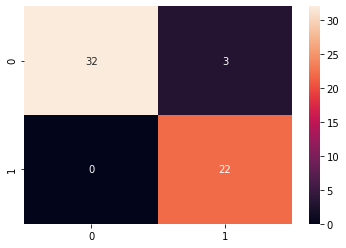

In [39]:
sns.heatmap(cm,annot=True)
plt.savefig('hm.png') 